In [1]:
load data from mysql database
import mysql.connector as sql
import pandas as pd
db_connection = sql.connect(host='localhost', database='mysqlprogram', user='root', password='mysql123', port='3309')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM heart')
table_rows = db_cursor.fetchall()
df = pd.DataFrame(table_rows)

# Separating the features and label variable 
X = df.iloc[: , :13]   # feature data
Y = df.iloc[: ,13]     # label data

In [12]:
# Splitting the dataset into training dats and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)


In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt 
Error_test =[]
no_of_trees_count = []

for i in range (1,13):
    estimator=i*20
    ADbClf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),n_estimators =estimator)
    ADbClf.fit(X_train,y_train)
    #Predict the response for test dataset
    predict_test = ADbClf.predict(X_test)
    print("Accuracy test:",metrics.accuracy_score(y_test, predict_test))
    print("Error test:",1-metrics.accuracy_score(y_test, predict_test))
    Error_test.append(1-metrics.accuracy_score(y_test, predict_test))
    no_of_trees_count.append(estimator)
    


Accuracy test: 0.7868852459016393
Error test: 0.21311475409836067
Accuracy test: 0.8524590163934426
Error test: 0.14754098360655743
Accuracy test: 0.8360655737704918
Error test: 0.16393442622950816
Accuracy test: 0.819672131147541
Error test: 0.180327868852459
Accuracy test: 0.819672131147541
Error test: 0.180327868852459
Accuracy test: 0.8032786885245902
Error test: 0.19672131147540983
Accuracy test: 0.7704918032786885
Error test: 0.2295081967213115
Accuracy test: 0.8032786885245902
Error test: 0.19672131147540983
Accuracy test: 0.7704918032786885
Error test: 0.2295081967213115
Accuracy test: 0.7704918032786885
Error test: 0.2295081967213115
Accuracy test: 0.7704918032786885
Error test: 0.2295081967213115
Accuracy test: 0.7704918032786885
Error test: 0.2295081967213115


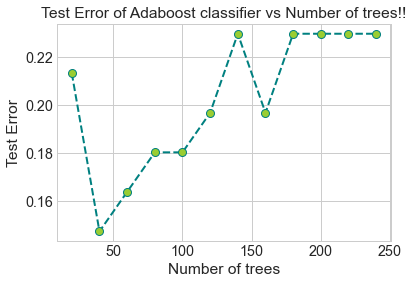

In [16]:

plt.style.use('seaborn-whitegrid')
# plotting the points  
plt.plot(no_of_trees_count, Error_test, color='teal', linestyle='dashed', linewidth = 2, 
         marker='o', markerfacecolor='yellowgreen', markersize=8) 

# naming the x axis 
plt.xlabel('Number of trees') 
# naming the y axis 
plt.ylabel('Test Error') 
  
# giving a title to my graph 
plt.title('Test Error of Adaboost classiﬁer vs Number of trees!!') 
  
# function to show the plot 
plt.show() 


In [18]:


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt 
no_of_trees_count = []
Error_train = []

print("*AdaBoost Classifier*")
for i in range (1,13):
    estimator=i*20
    ADbClf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),n_estimators = estimator)
    ADbClf.fit(X_train,y_train)
    #Predict the response for train dataset
    predict_train = ADbClf.predict(X_train)
 
    print("Accuracy train:",metrics.accuracy_score(y_train, predict_train))
    print("Error train:",1-metrics.accuracy_score(y_train, predict_train))
    Error_train.append(1-metrics.accuracy_score(y_train, predict_train))
    no_of_trees_count.append(estimator)
  

*AdaBoost Classifier*
Accuracy train: 0.8842975206611571
Error train: 0.11570247933884292
Accuracy train: 0.9132231404958677
Error train: 0.08677685950413228
Accuracy train: 0.9421487603305785
Error train: 0.05785123966942152
Accuracy train: 0.9586776859504132
Error train: 0.04132231404958675
Accuracy train: 0.9669421487603306
Error train: 0.03305785123966942
Accuracy train: 0.9752066115702479
Error train: 0.024793388429752095
Accuracy train: 0.9793388429752066
Error train: 0.02066115702479343
Accuracy train: 0.987603305785124
Error train: 0.012396694214875992
Accuracy train: 0.9834710743801653
Error train: 0.016528925619834656
Accuracy train: 0.987603305785124
Error train: 0.012396694214875992
Accuracy train: 0.9958677685950413
Error train: 0.004132231404958664
Accuracy train: 1.0
Error train: 0.0


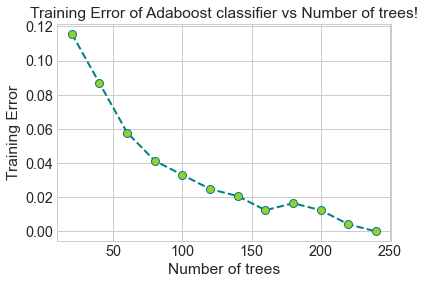

In [19]:
  
plt.style.use('seaborn-whitegrid')
# plotting the points  
plt.plot(no_of_trees_count, Error_train, color='teal', linestyle='dashed', linewidth = 2, 
         marker='o', markerfacecolor='yellowgreen', markersize=8) 

# naming the x axis 
plt.xlabel('Number of trees') 
# naming the y axis 
plt.ylabel('Training Error') 
  
# giving a title to my graph 
plt.title('Training Error of Adaboost classiﬁer vs Number of trees!') 
  
# function to show the plot 
plt.show() 

In [20]:



from sklearn.ensemble import AdaBoostClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt 
ADbClf_list=[]
labels=['Negative','Positive']

for i in range (1,5):
    estimator=i*50
    ADbClf_list.append(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),n_estimators = estimator))
    
VotingClf = VotingClassifier(estimators=[('ADbClf1', ADbClf_list[0]), ('ADbClf2', ADbClf_list[1]), ('ADbClf3', ADbClf_list[2]), ('ADbClf4', ADbClf_list[3])], voting='hard')
VotingClf.fit(X_train,y_train)
#Predict the response for test dataset
predict_test = VotingClf.predict(X_test)
print("*Voting Classifier*")
print("Accuracy test:",metrics.accuracy_score(y_test, predict_test))
print("Error test:",1-metrics.accuracy_score(y_test, predict_test))

*Voting Classifier*
Accuracy test: 0.8360655737704918
Error test: 0.16393442622950816


F1 Score Test:
 0.8387096774193549


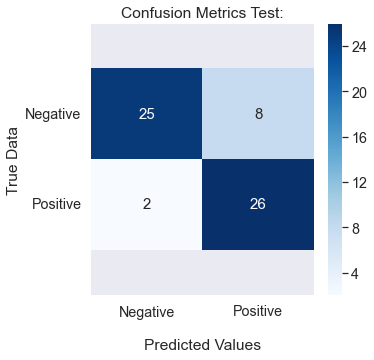

In [21]:

from sklearn.metrics import confusion_matrix 

confMatrixTest = confusion_matrix(y_test, predict_test)
df_cm = pd.DataFrame(confMatrixTest, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'True Data'
df_cm.columns.name = 'Predicted Values'
plt.figure(figsize = (5,5))
sn.set(font_scale=1.3)#for label size
ax=sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 15})# font size
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels,va="center",rotation = 0)
ax.xaxis.labelpad = 20
ax.set_title('Confusion Metrics Test:')

print('F1 Score Test:\n',metrics.f1_score(y_test, predict_test))



*Decision Tree Classifier*
Accuracy test: 0.8688524590163934
Error test: 0.1311475409836066
F1 Score Test:
 0.8709677419354839


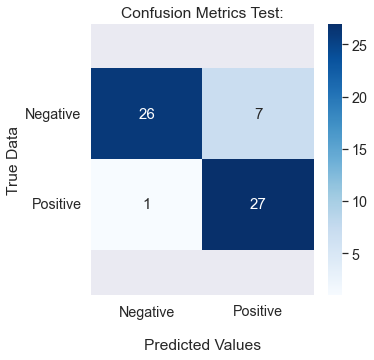

In [22]:


from sklearn.tree import DecisionTreeClassifier 
DtcClf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5) 
  
# Performing training 
DtcClf_entropy.fit(X_train, y_train)
#Predict the response for test dataset
predict_test = DtcClf_entropy.predict(X_test)
print("*Decision Tree Classifier*")
print("Accuracy test:",metrics.accuracy_score(y_test, predict_test))
print("Error test:",1-metrics.accuracy_score(y_test, predict_test))
from sklearn.metrics import confusion_matrix 

confMatrixTest = confusion_matrix(y_test, predict_test)
df_cm = pd.DataFrame(confMatrixTest, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'True Data'
df_cm.columns.name = 'Predicted Values'
plt.figure(figsize = (5,5))
sn.set(font_scale=1.3)#for label size
ax=sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 15})# font size
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels,va="center",rotation = 0)
ax.xaxis.labelpad = 20
ax.set_title('Confusion Metrics Test:')

print('F1 Score Test:\n',metrics.f1_score(y_test, predict_test))
